In [29]:
%pip install -Uq "unstructured[all-docs]" pillow lxml pillow
%pip install -Uq chromadb tiktoken
%pip install -Uq langchain langchain-community langchain-openai langchain-groq
%pip install -Uq python_dotenv
%pip install -Uq langchain-groq
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
import os
from unstructured.partition.pdf import partition_pdf

!apt-get install poppler-utils tesseract-ocr libmagic-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
libmagic-dev is already the newest version (1:5.41-3ubuntu0.1).
poppler-utils is already the newest version (22.02.0-2ubuntu0.6).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [30]:
# Reference: https://docs.unstructured.io/open-source/core-functionality/chunking
file_path = "./15_Photosynthesis.pdf"
chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,            # extract tables
    strategy="hi_res",                     # mandatory to infer tables

    extract_image_block_types=["Image"],   # Add 'Table' to list to extract image of tables
    # image_output_dir_path=output_path,   # if None, images and tables will saved in base64

    extract_image_block_to_payload=True,   # if true, will extract base64 for API usage

    chunking_strategy="by_title",          # or 'basic'
    max_characters=10000,                  # defaults to 500
    combine_text_under_n_chars=2000,       # defaults to 0
    new_after_n_chars=6000,

    # extract_images_in_pdf=True,          # deprecated
)


In [3]:
tables = []
texts = []

for chunk in chunks:
    if "Table" in str(type(chunk)):
        tables.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts.append(chunk.text)

In [31]:
texts

['Photosynthesis\n\nPhotosynthesis is the process by which plants, some bacteria and some protistans use the energy from sunlight to produce glucose from carbon dioxide and water. This glucose can be converted into pyruvate which releases adenosine triphosphate (ATP) by cellular respiration. Oxygen is also formed.\n\nPhotosynthesis may be summarised by the word equation:\n\nsunlight 1—————————- __ chlorophyll\n\nsunlight carbon dioxide + water 1—————————- __ glucose + oxygen chlorophyll\n\ncarbon dioxide + water\n\nglucose + oxygen\n\nThe conversion of usable sunlight energy into chemical energy is associated with the action of the green pigment chlorophyll.\n\nChlorophyll is a complex molecule. Several modifications of chlorophyll occur among plants and other photosynthetic organisms. All photosynthetic organisms have chlorophyll a. Accessory pigments absorb energy that chlorophyll a does not absorb. Accessory pigments include chlorophyll b (also c, d, and e in algae and protistans), 

In [32]:
elements = chunks[0].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()['metadata']['coordinates']['layout_width']

1654

## Prev Img processing

In [ ]:
import base64
from IPython.display import Image, display

def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    width = el.to_dict()['metadata']['coordinates']['layout_width']
                    height = el.to_dict()['metadata']['coordinates']['layout_height']
                    ratio = width / height
                    # Check if aspect ratio is reasonable
                    if 0.1 <= ratio <= 10:
                        print(ratio)
                        images_b64.append(el.metadata.image_base64)
                    # print(el.metadata)
                    # images_b64.append(el.metadata.image_base64)
    return images_b64

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))



In [ ]:
images = get_images_base64(chunks)

0


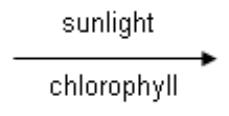

------------------------------------
1


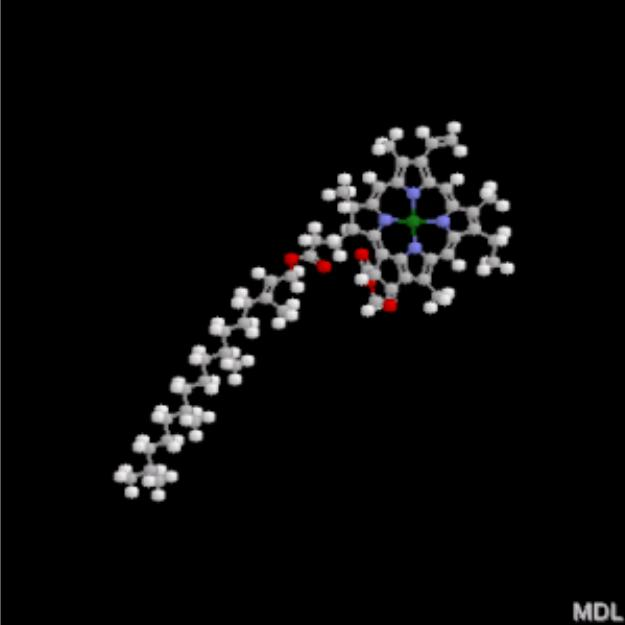

------------------------------------
2


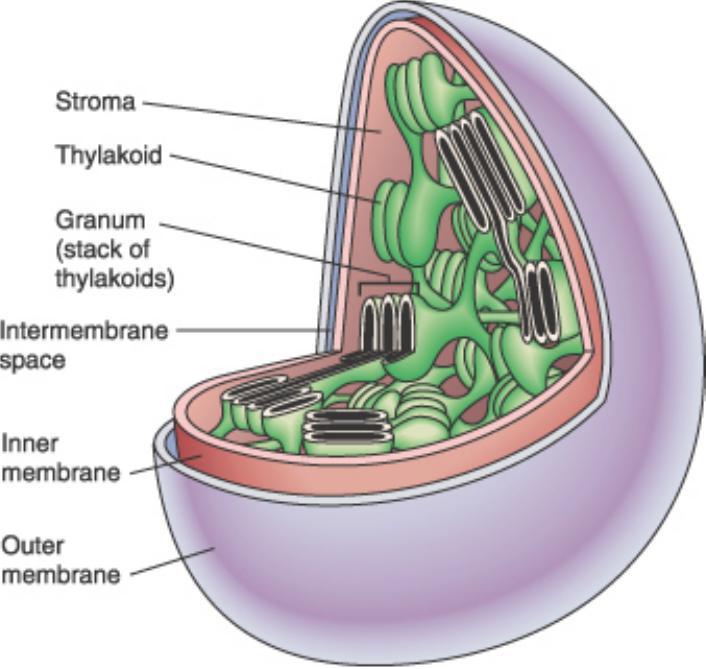

------------------------------------
3


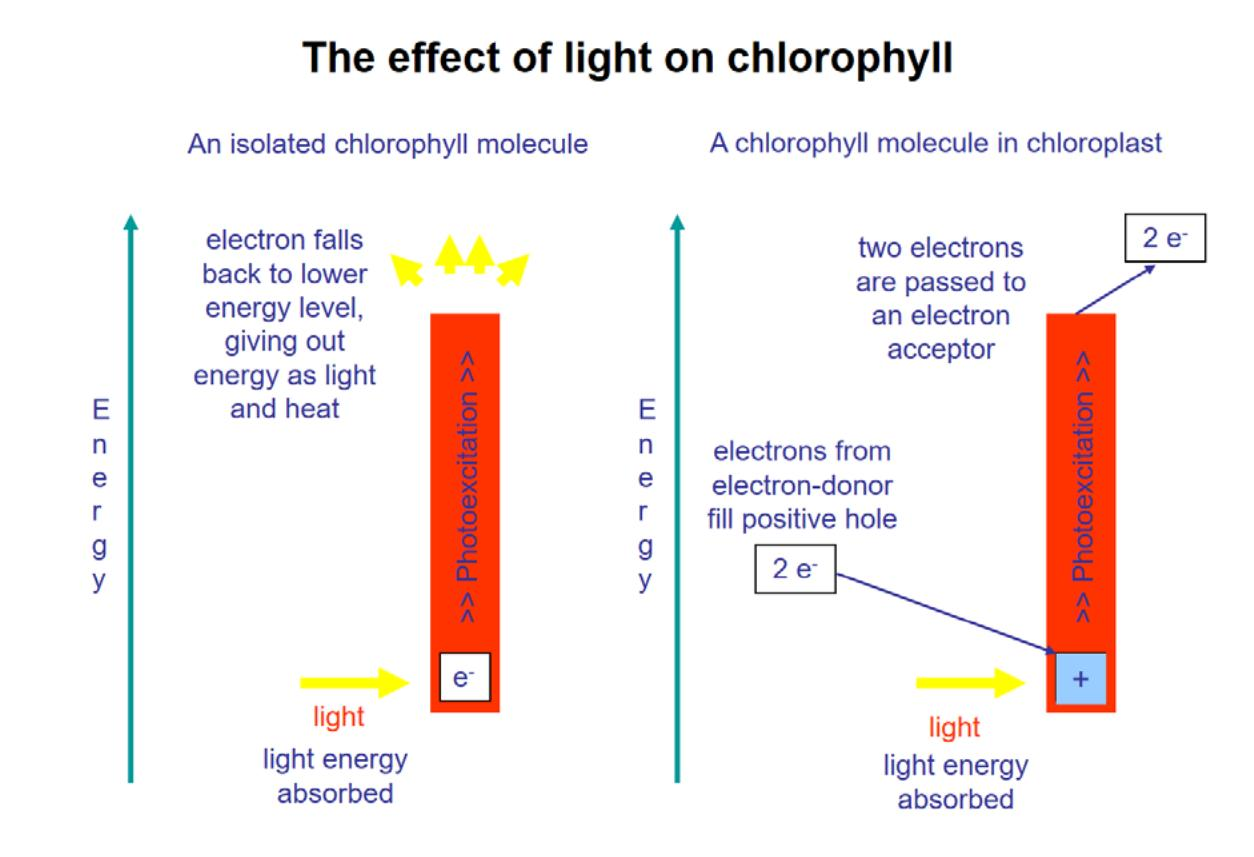

------------------------------------
4


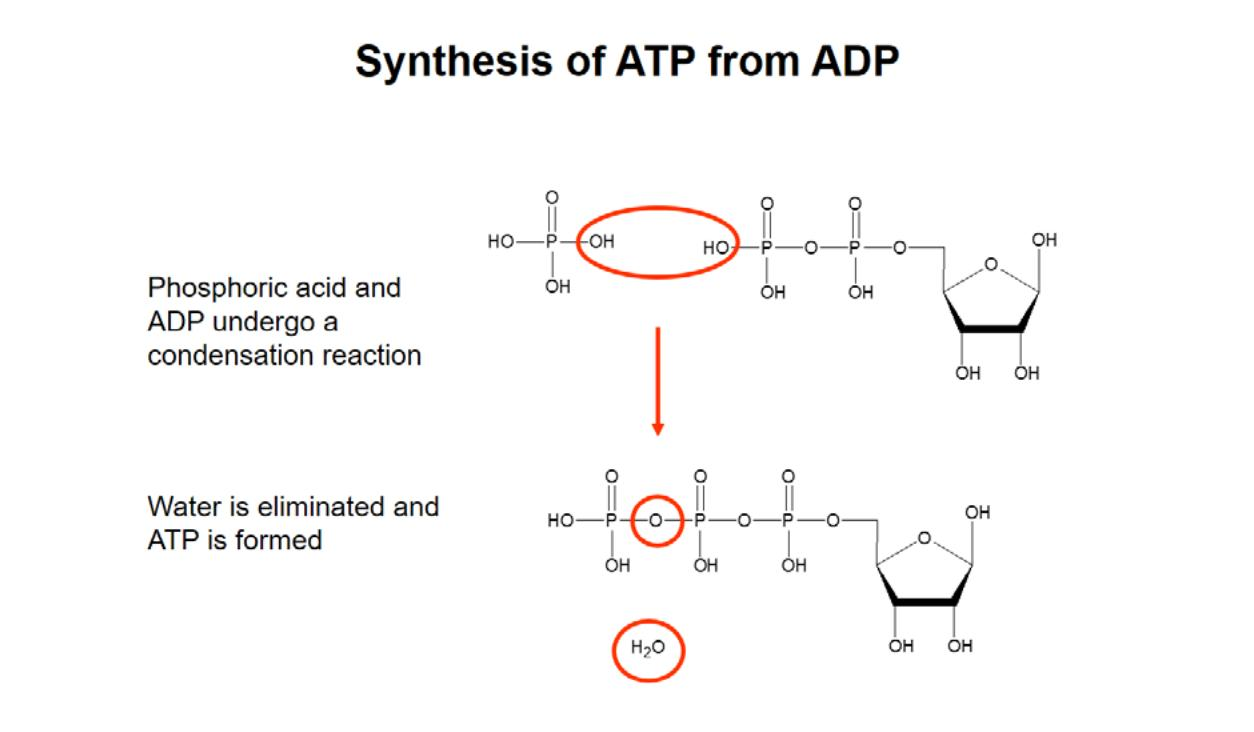

------------------------------------
5


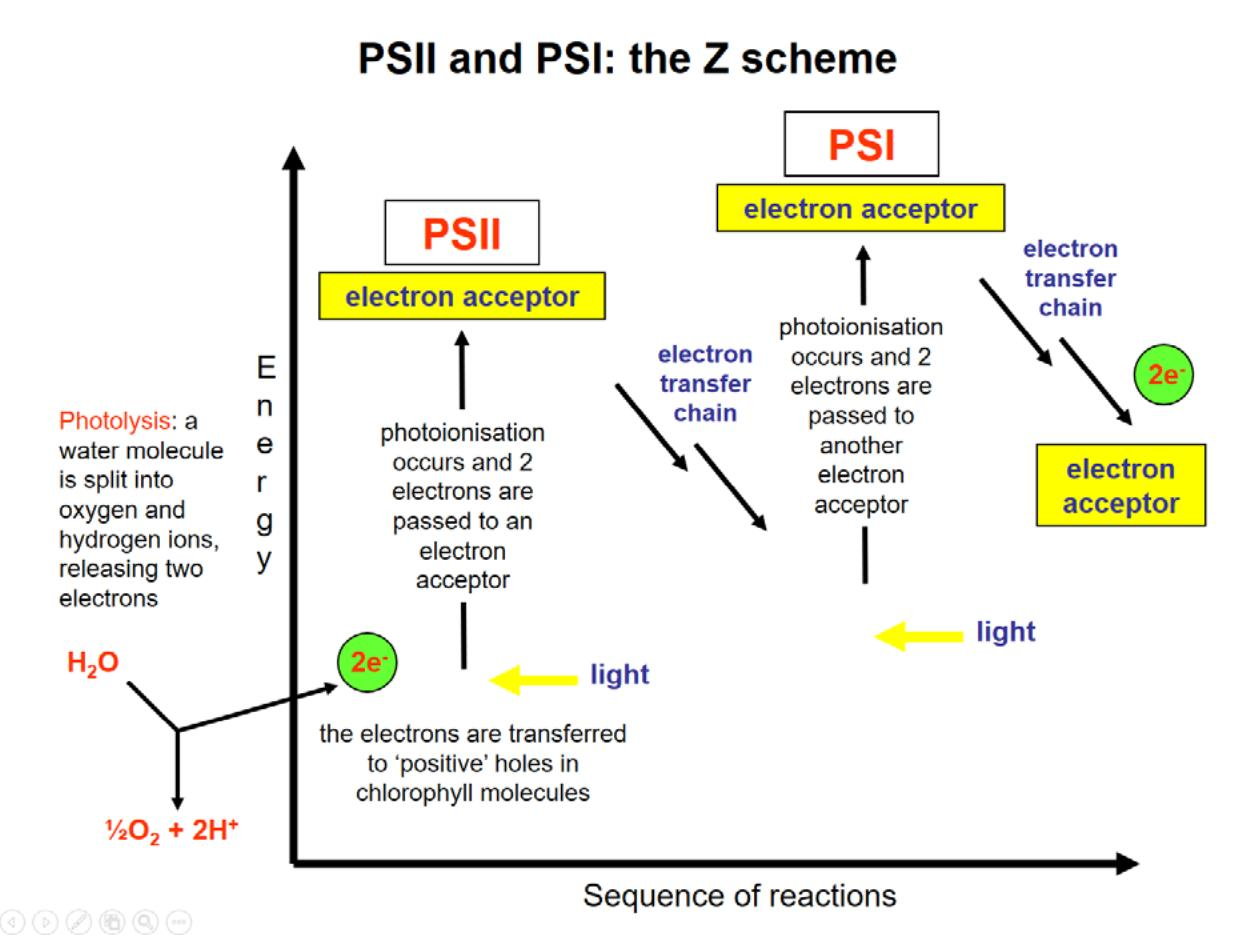

------------------------------------
6


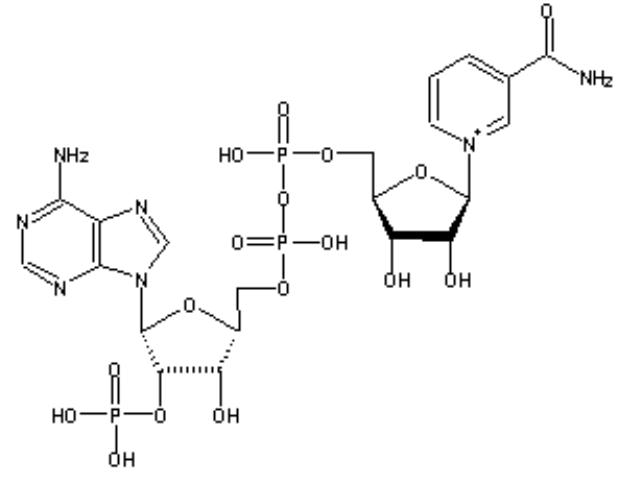

------------------------------------
7


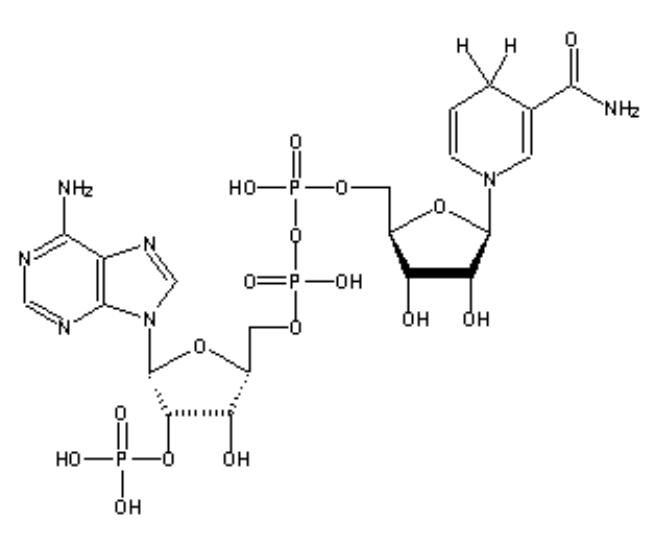

------------------------------------
8


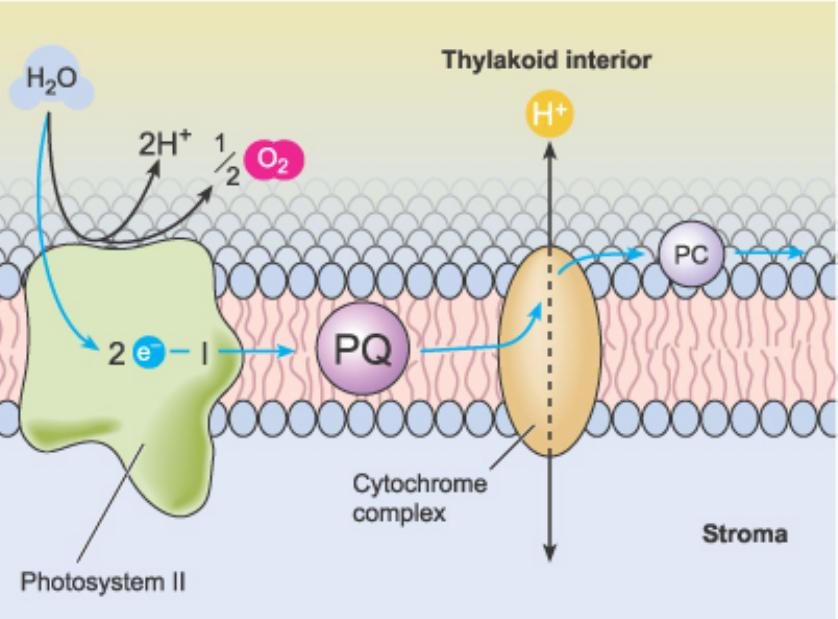

------------------------------------
9


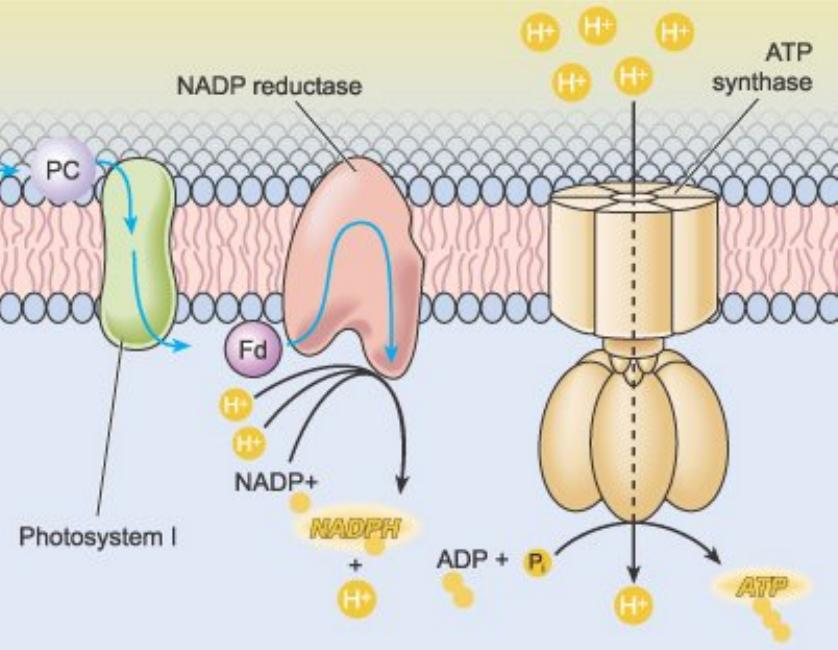

------------------------------------
10


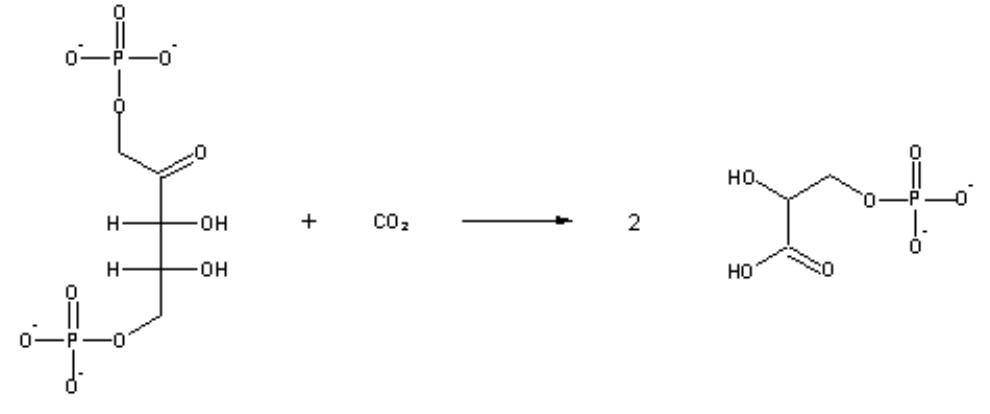

------------------------------------
11


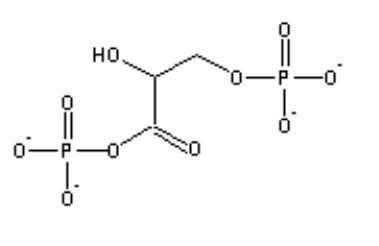

------------------------------------
12


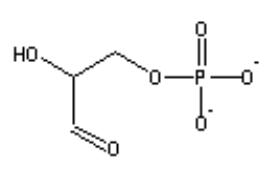

------------------------------------
13


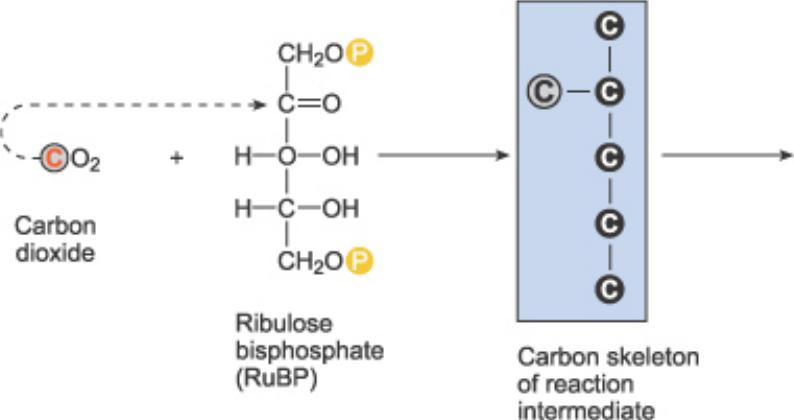

------------------------------------
14


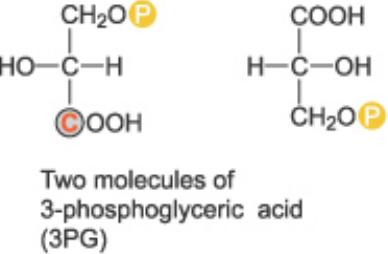

------------------------------------
15


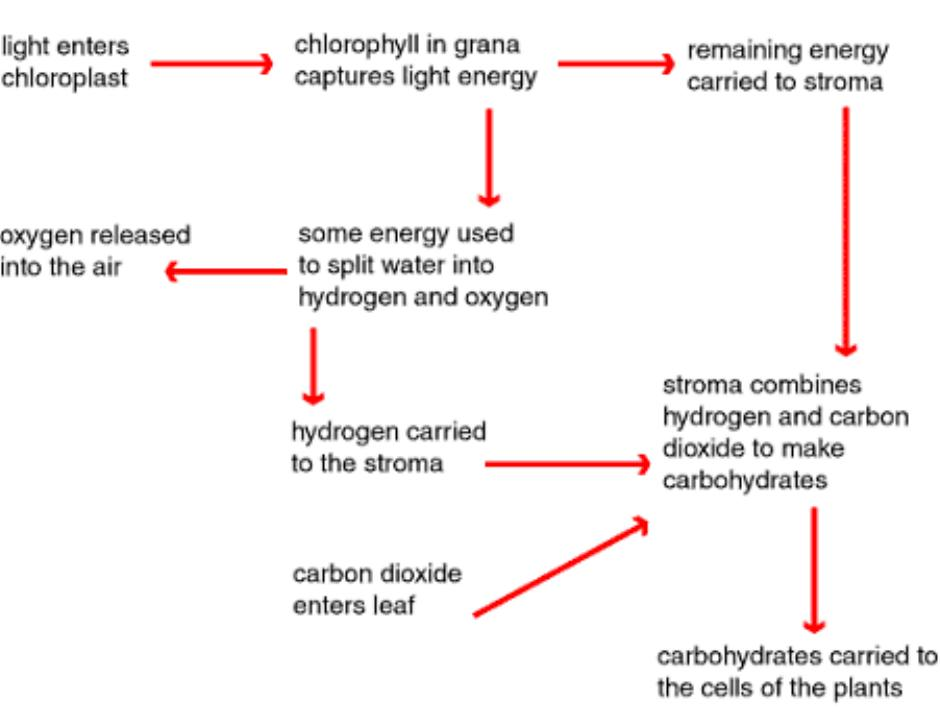

------------------------------------


In [ ]:
for i in range(len(images)):
    print(i)
    display_base64_image(images[i])
    print("------------------------------------")

## Only Text poster

In [34]:

from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser, SimpleJsonOutputParser
os.environ["LANGCHAIN_API_KEY"] = "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"
os.environ["GROQ_API_KEY"] = "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"

In [35]:
prompt_text =  """
Objective:
You are tasked with analyzing a document and extracting key content to automatically generate a poster.
Your goal is to identify and classify important elements such as heading, sub_heading, text_box, and bullet_points.
This is your content you have to work on: {element}

Instructions:
1) Understand the Content:

- Read the document carefully to identify major sections, key ideas, and supporting information and select the most important informatio
  to be put on the poster.
- Extract relevant content that fits into a visually appealing poster format.

2) Identify Elements:

- Headings: Main sections or topics should be converted into concise, attention-grabbing headings.
- Subheadings: Secondary information or breakdowns of main sections.
- Text Boxes: Use text boxes for explanations, descriptions, and contextual information.
- Bullet Points: Summarize key points or lists in a structured and concise format.
- Graphs/Images (optional): Indicate if any data visualization or images are necessary to support the text.



Exemplar:
ex1
```
[
    {{
        "element_type": "heading_1",
        "content": "Introduction to Renewable Energy"
    }},
    {{
        "element_type": "text_box_1",
        "content": "Renewable energy sources, such as solar, wind, and hydropower, are becoming increasingly important to reduce carbon emissions and promote sustainability. These energy sources are replenished naturally and have minimal impact on the environment when compared to traditional fossil fuels."
    }},
    {{
        "element_type": "sub_heading_1",
        "content": "Key Benefits of Renewable Energy"
    }},
    {{
        "element_type": "bullet_points_1",
        "content": [
            "Reduces greenhouse gas emissions, helping to mitigate climate change",
            "Lowers dependence on finite fossil fuel resources, enhancing energy security",
            "Provides long-term cost savings through reduced operational costs and minimal fuel expenses",
            "Promotes local job creation and economic development in the clean energy sector"
        ]
    }},
    {{
        "element_type": "text_box_2",
        "content": "Recent advancements in technology have significantly improved the efficiency and affordability of renewable energy systems. Innovations such as smart grids and battery storage solutions are helping to integrate renewable energy into existing power grids more seamlessly."
    }},
    {{
        "element_type": "sub_heading_2",
        "content": "Challenges and Future Scope"
    }},
    {{
        "element_type": "bullet_points_2",
        "content": [
            "Storage and grid integration to ensure reliability and stability of renewable sources",
            "Policy and regulatory challenges that affect large-scale adoption",
            "Need for increased investments in research and development to improve efficiency",
            "Public awareness and education to encourage adoption of renewable technologies"
        ]
    }},
    {{
        "element_type": "text_box_3",
        "content": "Despite the challenges, the future of renewable energy looks promising with continued innovation and global efforts to
        transition toward a cleaner energy economy. Governments, industries, and communities are collaborating to create a sustainable energy landscape."
    }}
]
```


ex2
```
[
    {{
        "element_type": "heading_1",
        "content": "Space Exploration: Challenges, Innovations, and Future Prospects"
    }},
    {{
        "element_type": "text_box_1",
        "content": "Space exploration has expanded human understanding of the universe, driving scientific breakthroughs, technological advancements, and discussions about the future of interplanetary travel. From robotic probes to human-led missions, space agencies and private enterprises continue to push the limits of what is achievable beyond Earth."
    }},
    {{
        "element_type": "sub_heading_1",
        "content": "Current Challenges in Space Exploration"
    }},
    {{
        "element_type": "bullet_points_1",
        "content": [
            "High costs associated with spacecraft development, mission planning, and long-term sustainability",
            "Radiation exposure poses severe health risks for astronauts on extended space missions",
            "Technical and engineering challenges in propulsion systems for deep-space travel",
            "Space debris management and sustainability issues impacting future missions",
            "Psychological and physiological effects of prolonged isolation in space environments"
        ]
    }},
    {{
        "element_type": "text_box_2",
        "content": "Overcoming these challenges requires advancements in materials science, improved radiation shielding, and the development of efficient propulsion systems. International collaboration plays a crucial role in addressing these issues and ensuring the long-term success of space missions."
    }},
    {{
        "element_type": "sub_heading_2",
        "content": "Innovative Technologies in Space Exploration"
    }},
    {{
        "element_type": "bullet_points_2",
        "content": [
            "Reusable rocket technology reduces costs and improves mission feasibility",
            "AI-driven navigation systems enhance precision and efficiency in space travel",
            "Space habitats designed for long-duration missions improve astronaut safety",
            "Nuclear propulsion systems could significantly cut travel time for deep-space missions",
            "Autonomous robotic explorers assist in planetary research and resource extraction"
        ]
    }},
    {{
        "element_type": "sub_heading_3",
        "content": "The Future of Space Travel and Exploration"
    }},
    {{
        "element_type": "text_box_3",
        "content": "Future missions will focus on establishing a permanent human presence on the Moon and Mars. Investments in asteroid mining and space-based manufacturing are expected to drive economic opportunities beyond Earth. Advancements in propulsion and life-support systems will be critical in making long-duration space travel viable."
    }},
    {{
        "element_type": "text_box_4",
        "content": "As space exploration continues to evolve, humanity is on the verge of becoming an interplanetary species. The development of sustainable space ecosystems and interstellar travel technologies will define the next era of human civilization."
    }}
]
```

ex3
```
[
    {{
        "element_type": "heading_1",
        "content": "The Expanding Role of Artificial Intelligence in Cybersecurity"
    }},
    {{
        "element_type": "text_box_1",
        "content": "Artificial Intelligence (AI) is transforming cybersecurity by offering real-time threat detection, predictive analytics, and automated security responses. AI-driven systems process vast datasets to recognize patterns, detect anomalies, and mitigate cyber threats before they cause significant damage. With the rise of cyberattacks, AI plays a crucial role in strengthening defenses and reducing human workload in security operations."
    }},
    {{
        "element_type": "sub_heading_1",
        "content": "Key Applications of AI in Cybersecurity"
    }},
    {{
        "element_type": "bullet_points_1",
        "content": [
            "AI-powered threat detection prevents cyber attacks before they escalate by identifying malicious patterns",
            "Behavioral analytics help detect anomalies in user activities to prevent unauthorized access",
            "Automated security responses improve reaction times, reducing the impact of cyber incidents",
            "Advanced encryption and AI-based authentication enhance data protection across networks",
            "Machine learning models continuously adapt to new cyber threats, ensuring proactive defense"
        ]
    }},
    {{
        "element_type": "sub_heading_2",
        "content": "Challenges and Ethical Concerns in AI-Driven Cybersecurity"
    }},
    {{
        "element_type": "text_box_2",
        "content": "Despite its benefits, AI in cybersecurity comes with challenges such as false positives, adversarial AI attacks, and
          ethical concerns regarding data privacy and surveillance. Over-reliance on AI could also lead to reduced human intervention, making systems vulnerable to
          sophisticated hacking techniques. Ensuring transparency, fairness, and accountability in AI-driven security solutions is essential for maintaining trust and reliability."
    }},
    {{
        "element_type": "text_box_3",
        "content": "With continuous advancements, AI is set to become an indispensable component of modern cybersecurity frameworks.
        However, organizations must strike a balance between automation and human expertise to ensure robust, adaptive,
        and ethical cybersecurity solutions. Future developments in AI governance and security policies will play a crucial role in shaping the safe and effective integration of AI into cybersecurity."
    }}
]
```


3) POINTS TO BE STRICTLY FOLLOWED:
-Return the extracted content in a JSON format where each element is associated with a type and its content.
-The keys are element_type, content
-DO NOT GENERATE ANY EXTRA CONTENT ONLY. STRICTLY FOLLOW THE FORMAT GIVEN BELOW IN THE EXEMPLAR.
-THE TOTAL NUMBER OF ELEMENTS SHOULD BE BETWEEN 7 - 15.
-THERE SHOULD BE ONLY 1 Heading and other elements can occur any number of times
-DO NOT GENERATE ANY EXPLANATION LIKE "here is your summarisation or based on your document..." . "THis script assumes .."
-DO NOT PRINT "\n" or uncesseary formatting special characters
"""



prompt = ChatPromptTemplate.from_template(prompt_text)
model = ChatGroq(temperature=0.5, model="llama-3.3-70b-versatile")
chain = {"element": lambda x: x} | prompt | model | SimpleJsonOutputParser()
# can lead to error if LLM generates something not in JSON format.


In [36]:
temp_text = [" ".join(texts)]
text_summaries = chain.batch(temp_text, {"max_concurrency": 3})


In [37]:
text_summaries

[[{'element_type': 'heading_1', 'content': 'Photosynthesis'},
  {'element_type': 'text_box_1',
   'content': 'Photosynthesis is the process by which plants, some bacteria and some protistans use the energy from sunlight to produce glucose from carbon dioxide and water.'},
  {'element_type': 'sub_heading_1',
   'content': 'The Process of Photosynthesis'},
  {'element_type': 'bullet_points_1',
   'content': ['Light-dependent reactions: light energy is trapped by chlorophyll to make ATP and NADPH',
    'Light-independent reactions: ATP and NADPH are used to make carbohydrates from carbon dioxide',
    'Water is split into oxygen, hydrogen ions and free electrons',
    'Electrons are transferred to an electron acceptor, resulting in the formation of NADPH']},
  {'element_type': 'text_box_2',
   'content': 'The overall equation for photosynthesis is: sunlight + carbon dioxide + water = glucose + oxygen'},
  {'element_type': 'sub_heading_2', 'content': 'Importance of Chlorophyll'},
  {'eleme

In [38]:
prompt_text = """"

You are a poster designer. Youre task is to generate bounding boxes for the content.
You are given a json object of element_type and content. Based on the content you u have to predict
  X_center : the x coord of center of bounding box
  Y_center : the x coord of center of bounding box
  h : height of bounding box
  w : width of bounding box
  Here is your content: {content}

  The size of the poster is {canvas_width} and canvas {canvas_height}
  font size of heading is 25px
  font size of subheading is 20px
  font size of text_box and bullet_points is 15px

  Your task is to generate appropriate bounding boxes that should be non overlapping, aesthetically pleasing
  and content should be enclosed within
  The heading should always be at the top
  The text_box and bullet_points can be side by side or one below the other
  The output has to be  JSON format

  Exemplar:

   {{
    'heading_1': [600, 50, 40, 1000],
    'text_box_1': [300, 130, 100, 300],
    'sub_heading_1': [125, 220, 50, 1],
    'bullet_points_1': [600, 400, 120, 500],
    'sub_heading_2': [600, 400, 40, 1000],
    'bullet_points_2': [600, 480, 120, 500],
    'sub_heading_3': [600, 580, 40, 1000],
    'text_box_2': [600, 650, 100, 1000],
    'sub_heading_4': [600, 730, 40, 1000],
    'bullet_points_3': [600, 780, 100, 500]
  }}

  OUTPUT FORMAT
  - It has to be a strict JSON object with element_type (from content) and (X_cenetr,y_center, height, width)
    bullet_points_3': [600, 780, 500, 100]
  - DO NOT PRINT ANY THING EXTRA, "like heres your ..." OR any reasoning steps

  """

prompt = ChatPromptTemplate.from_template(prompt_text)
model = ChatGroq(temperature=0.5, model="llama-3.3-70b-versatile")
chain =  prompt | model | SimpleJsonOutputParser()




In [39]:
bboxes = chain.invoke({"content": text_summaries[0], "canvas_width":"1200px", "canvas_height":"800px" })


In [40]:
bboxes

{'heading_1': [600, 50, 40, 1000],
 'sub_heading_1': [600, 120, 30, 1000],
 'text_box_1': [50, 170, 200, 550],
 'bullet_points_1': [650, 170, 200, 550],
 'sub_heading_2': [600, 410, 30, 1000],
 'text_box_2': [50, 460, 200, 100],
 'bullet_points_2': [650, 460, 200, 150],
 'sub_heading_3': [600, 630, 30, 1000],
 'text_box_3': [50, 680, 200, 100],
 'bullet_points_3': [650, 680, 200, 100]}

In [83]:
import os
print("Current working directory:", os.getcwd())
print("Files:", os.listdir("."))

Current working directory: /content
Files: ['.config', '15_Photosynthesis.pdf', 'arial.ttf', 'arialbd.ttf', '.ipynb_checkpoints', 'sample_data']


In [84]:
from PIL import Image, ImageDraw, ImageFont
import textwrap

class GeneratePoster:
    def __init__(self, content_data, bounding_boxes, canvas_width=1200, canvas_height=800, padding = 10):
        """
        Initialize the poster generator with content and layout configuration

        Args:
            content_data: List of dictionaries containing element_type and content
            bounding_boxes: Dictionary mapping element_type to (x_center, y_center, width, height)
            canvas_width: Width of the poster in pixels
            canvas_height: Height of the poster in pixels
        """
        self.content_data = content_data
        self.bounding_boxes = bounding_boxes
        self.canvas_width = canvas_width
        self.canvas_height = canvas_height
        self.padding = padding

        self.colors = {
            'heading': (0, 100, 0),  # dark green
            'sub_heading': (0, 150, 0),  # medium green
            'text_box': (0, 0, 0),  # black
            'bullet_points': (0, 0, 0)  # black
        }
        # Initialize fonts
        self._initialize_fonts()

    def _initialize_fonts(self):
        """Initialize all required fonts with fallbacks"""
        try:
            self.fonts = {
                'heading': ImageFont.truetype("./arialbd.ttf", 30),
                'sub_heading': ImageFont.truetype("./arialbd.ttf", 25),
                'text_box': ImageFont.truetype("./arial.ttf", 20),
                'bullet_points': ImageFont.truetype("./arial.ttf", 20)
            }
        except:
            # Fallback to default fonts if specified fonts not found
            default_font = ImageFont.load_default()
            self.fonts = {
                'heading': default_font,
                'sub_heading': default_font,
                'text_box': default_font,
                'bullet_points': default_font
            }

    def _draw_text_in_box(self, draw, text, box, font, color, is_bullet_points=False, show_box = False):
        """
        Draw text within a bounding box with proper wrapping

        Args:
            draw: PIL ImageDraw object
            text: Text content (string or list of strings for bullet points)
            box: Tuple of (x_center, y_center, width, height)
            font: Font to use
            color: Text color
            is_bullet_points: Whether to render as bullet points
        """
        x_center, y_center, height, width = box
        x_left = x_center - width // 2
        y_top = y_center - height // 2

        # Add 10px padding inside the box
        content_x = x_left + self.padding
        content_y = y_top + self.padding
        content_width = width - 2*self.padding
        content_height = height - 2*self.padding

        # Draw the bounding box rectangle if requested
        if show_box:
            draw.rectangle(
                [(x_left, y_top), (x_left + width, y_top + height)],
                outline=(200, 200, 200),  # Light gray border
                width=2
            )

        if is_bullet_points and isinstance(text, list):
            # Handle bullet points
            line_height = font.size + 5
            current_y = content_y

            for item in text:
                # Draw bullet point
                draw.text((content_x, current_y + 5), "•", fill=color, font=font)

                # Wrap text with padding consideration
                wrapped_lines = textwrap.wrap(item, width=content_width//(font.size//2))
                for line in wrapped_lines:
                    draw.text((content_x + 20, current_y), line, fill=color, font=font)
                    current_y += line_height

                    # Check if we've exceeded the box height
                    if current_y > y_top + content_height:
                        break
        else:
            # Handle regular text
            if isinstance(text, list):
                text = " ".join(text)

            # Wrap text with padding consideration
            wrapped_lines = textwrap.wrap(text, width=content_width//(font.size//2))
            line_height = font.size + 5
            current_y = content_y

            for line in wrapped_lines:
                draw.text((content_x, current_y), line, fill=color, font=font)
                current_y += line_height

                # Check if we've exceeded the box height
                if current_y > y_top + content_height:
                    break


    def draw(self, output_path="poster.png"):
        """
        Generate and save the poster

        Args:
            output_path: Path to save the generated poster
        """
        # Create blank canvas
        image = Image.new('RGB', (self.canvas_width, self.canvas_height), (255, 255, 255))
        draw = ImageDraw.Draw(image)

        # Draw each element
        for element in self.content_data:
            element_type = element['element_type']
            content = element['content']
            box = self.bounding_boxes[element_type]

            # Determine font and color
            if element_type.startswith('heading'):
                font = self.fonts['heading']
                color = self.colors['heading']
                bullet = False
            elif element_type.startswith('sub_heading'):
                level = element_type.split('_')[-1]
                font = self.fonts['sub_heading']
                color = self.colors['sub_heading']
                bullet = False
            elif element_type.startswith('text_box'):
                font = self.fonts['text_box']
                color = self.colors['text_box']
                bullet = False
            elif element_type.startswith('bullet_points'):
                font = self.fonts['bullet_points']
                color = self.colors['bullet_points']
                bullet = True

            self._draw_text_in_box(draw, content, box, font, color, is_bullet_points=bullet, show_box=True)

        # Save and return the image
        #image.save(output_path)
        image.show()
        return image





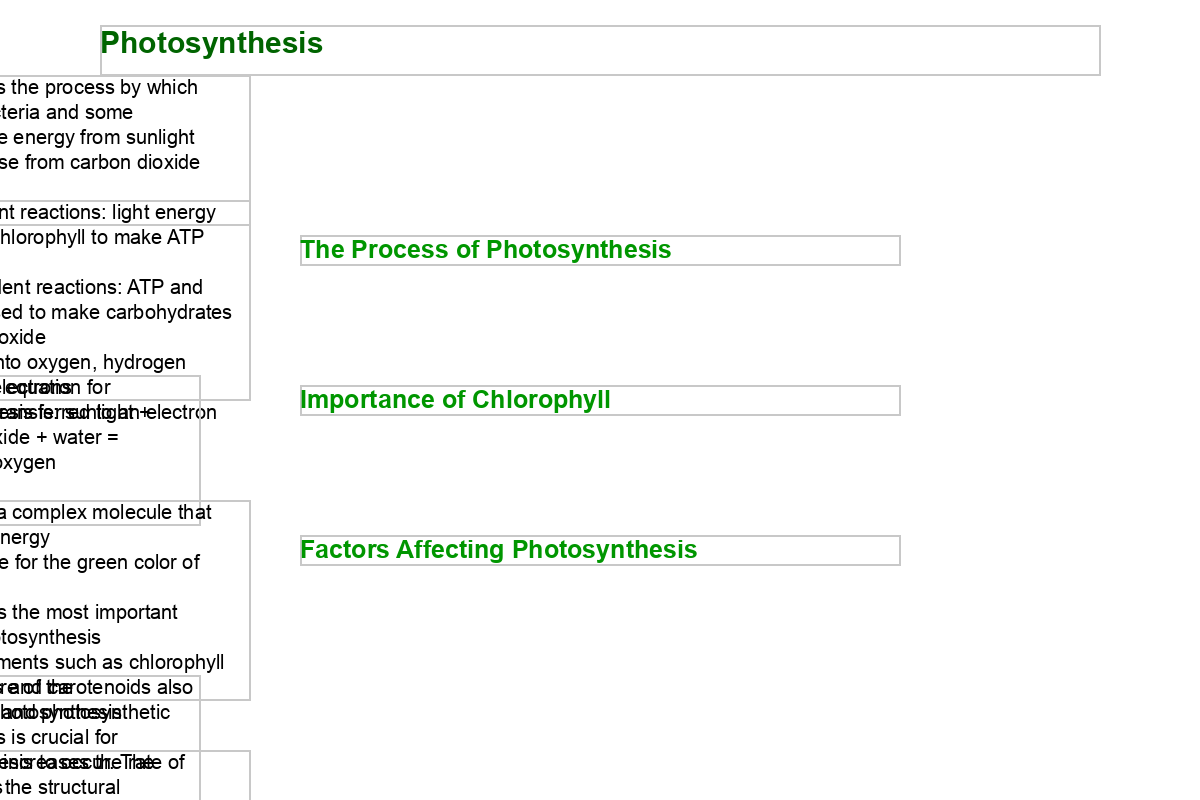

In [85]:
# content_data = [
#  {'element_type': 'heading_1', 'content': 'Photosynthesis: The Process of Life'},
#  {'element_type': 'text_box_1', 'content': 'Photosynthesis is the process by which plants, some bacteria, and protists convert sunlight into chemical energy stored in glucose. This process releases oxygen and is essential for life on Earth.'},
#  {'element_type': 'sub_heading_1', 'content': 'Structure of Chlorophyll'},
#  {'element_type': 'bullet_points_1', 'content': ['Lipid-soluble hydrocarbon tail (C20H39-)', 'Hydrophilic head with a magnesium ion at its center', 'Different side-groups distinguish various chlorophylls']},
#  {'element_type': 'sub_heading_2', 'content': 'Light-Dependent Reactions'},
#  {'element_type': 'bullet_points_2', 'content': ['Splitting of water (photolysis) produces oxygen and hydrogen ions', 'Transfer of electrons through the Z scheme generates ATP and NADPH', 'Chemiosmosis drives ATP synthesis']},
#  {'element_type': 'sub_heading_3', 'content': 'Light-Independent Reactions (Calvin Cycle)'},
#  {'element_type': 'text_box_2', 'content': 'Carbon dioxide is fixed into glucose through a series of enzyme-catalyzed reactions. ATP and NADPH provide the energy and reducing power for this process.'},
#  {'element_type': 'sub_heading_4', 'content': 'Factors Affecting Photosynthesis'},
#  {'element_type': 'bullet_points_3', 'content': ['Light intensity: Increases rate until saturation', 'Carbon dioxide concentration: Affects the Calvin cycle', 'Temperature: Impacts enzyme activity and overall efficiency']}
# ]


# # x_center, y_center, h, w
# bounding_boxes = {
#     'heading_1': [600, 50, 80, 1000],
#     'text_box_1': [600, 130, 100, 1000],
#     'sub_heading_1': [600, 220, 50, 1000],
#     'bullet_points_1': [600, 300, 120, 500],
#     'sub_heading_2': [600, 400, 40, 1000],
#     'bullet_points_2': [600, 480, 120, 500],
#     'sub_heading_3': [600, 580, 40, 1000],
#     'text_box_2': [600, 650, 100, 1000],
#     'sub_heading_4': [600, 730, 40, 1000],
#     'bullet_points_3': [600, 780, 100, 500]
# }

content_data = text_summaries[0]
bounding_boxes = bboxes
poster = GeneratePoster(content_data, bounding_boxes, padding = 0)
poster.draw("photosynthesis_poster.png")

## Multimodal summary

In [55]:
import base64
from IPython.display import Image, display

image_summaries = []
class imginfo:
    def __init__(self, name, base64_code, summary = ""):
        self.name = name
        self.base64_code = base64_code
        self.summary = summary

def get_images_info(chunks):
    i = 0
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    width = el.to_dict()['metadata']['coordinates']['layout_width']
                    height = el.to_dict()['metadata']['coordinates']['layout_height']
                    ratio = width / height
                    # Check if aspect ratio is reasonable
                    if 0.1 <= ratio <= 10:
                        # print(ratio)
                        image_summaries.append(imginfo(f"img_{i}", el.metadata.image_base64))
                        i += 1
                    # print(el.metadata)
                    # images_b64.append(el.metadata.image_base64)

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))


In [56]:
get_images_info(chunks)


img_0


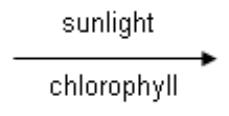

------------------------------------------------------------
img_1


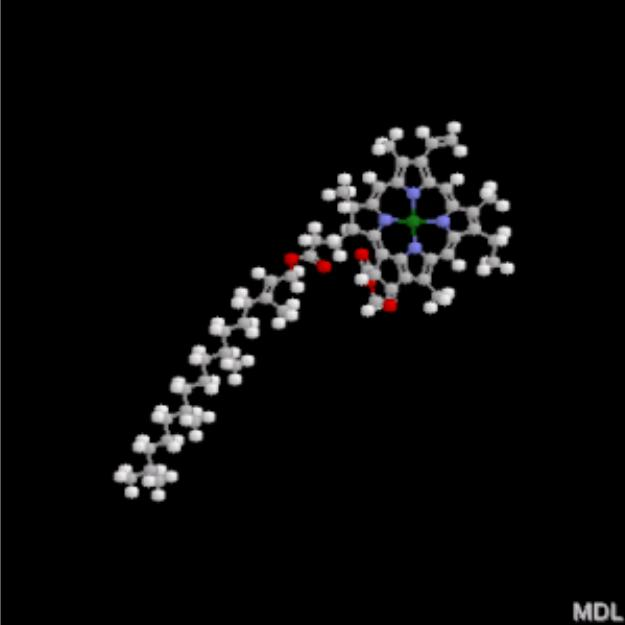

------------------------------------------------------------
img_2


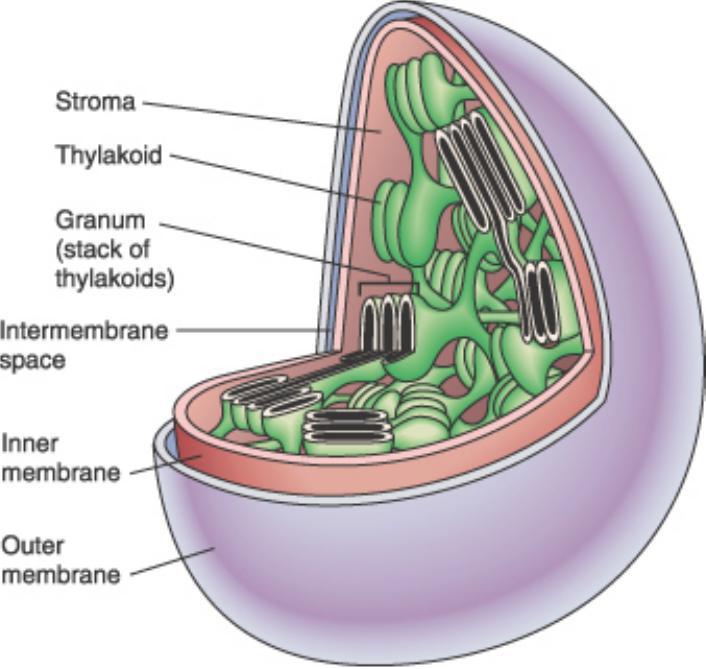

------------------------------------------------------------
img_3


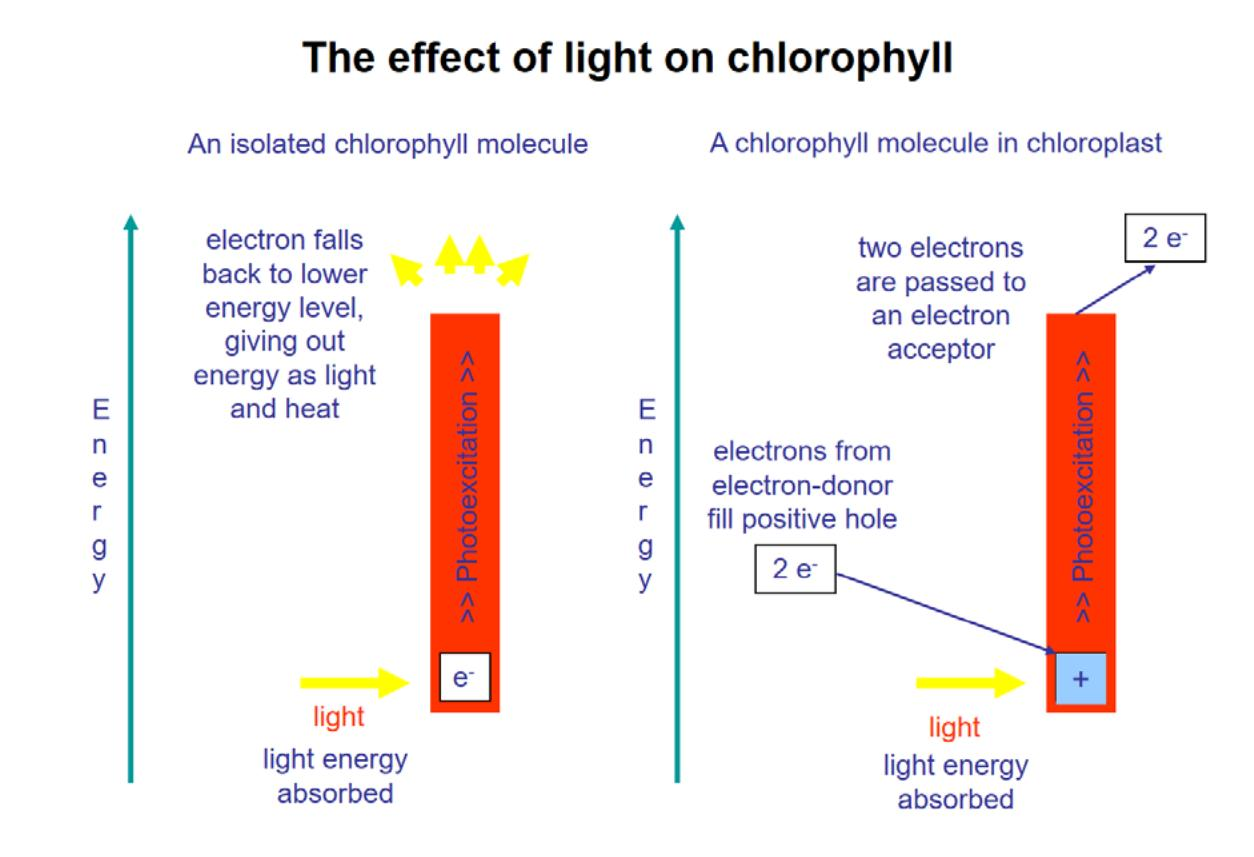

------------------------------------------------------------
img_4


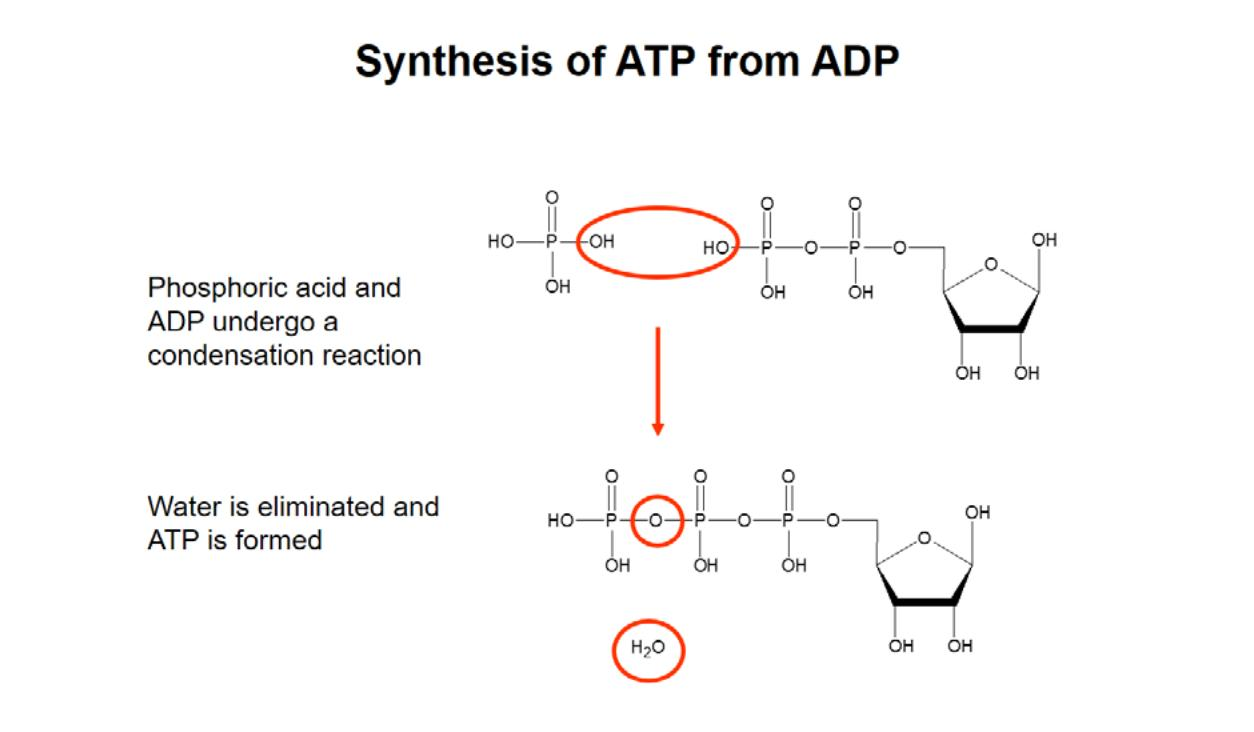

------------------------------------------------------------
img_5


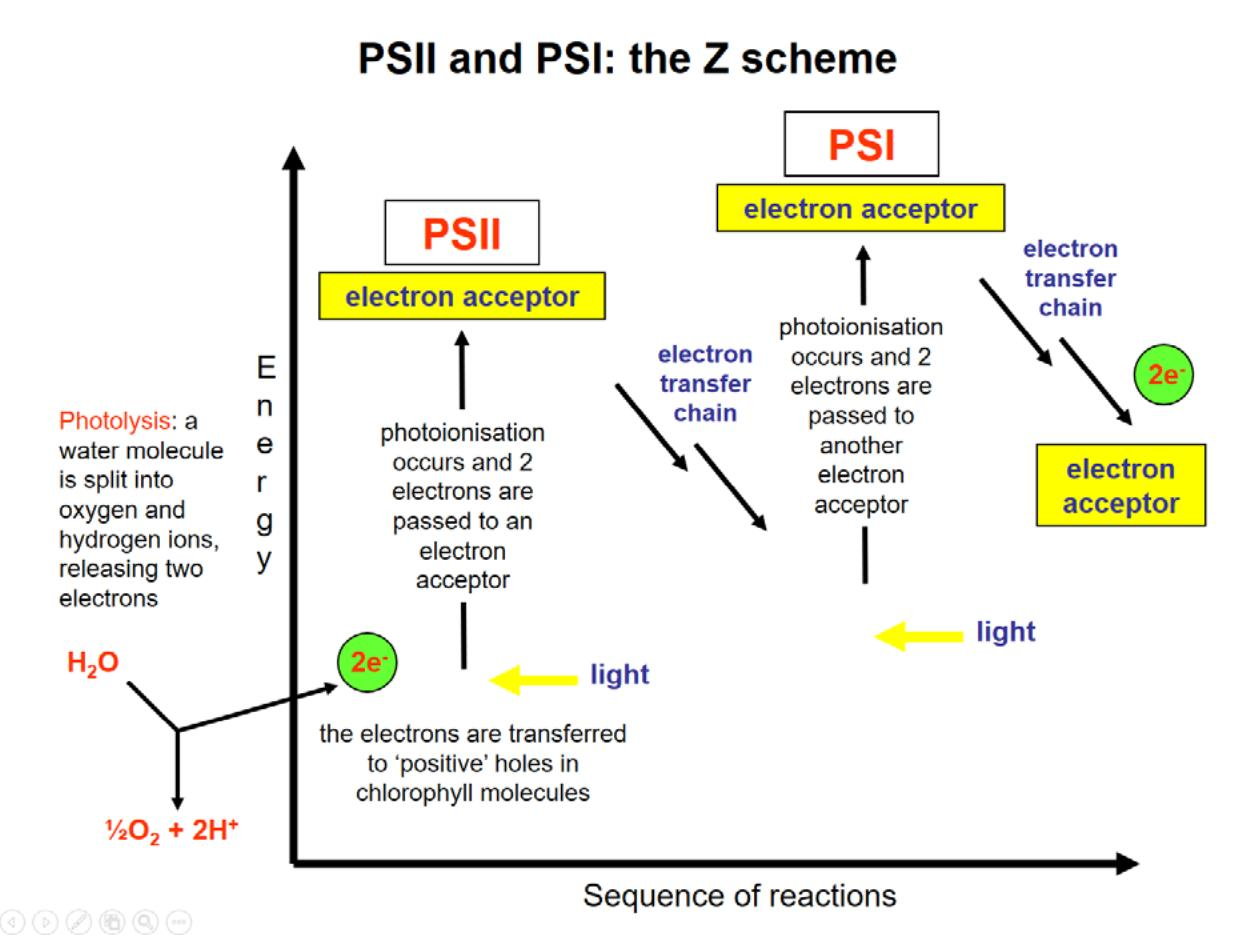

------------------------------------------------------------
img_6


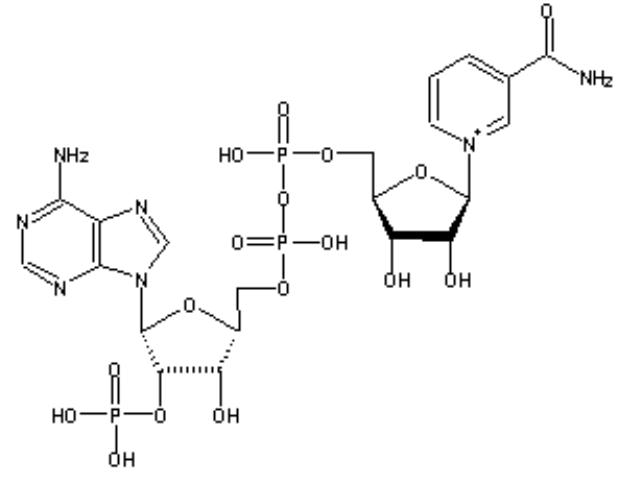

------------------------------------------------------------
img_7


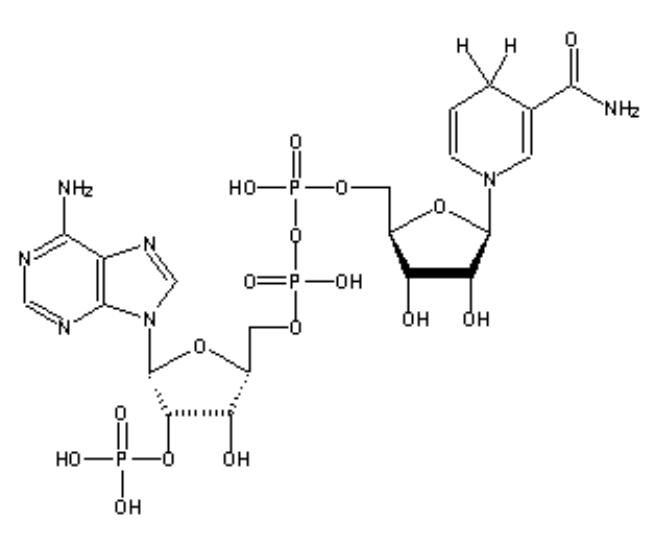

------------------------------------------------------------
img_8


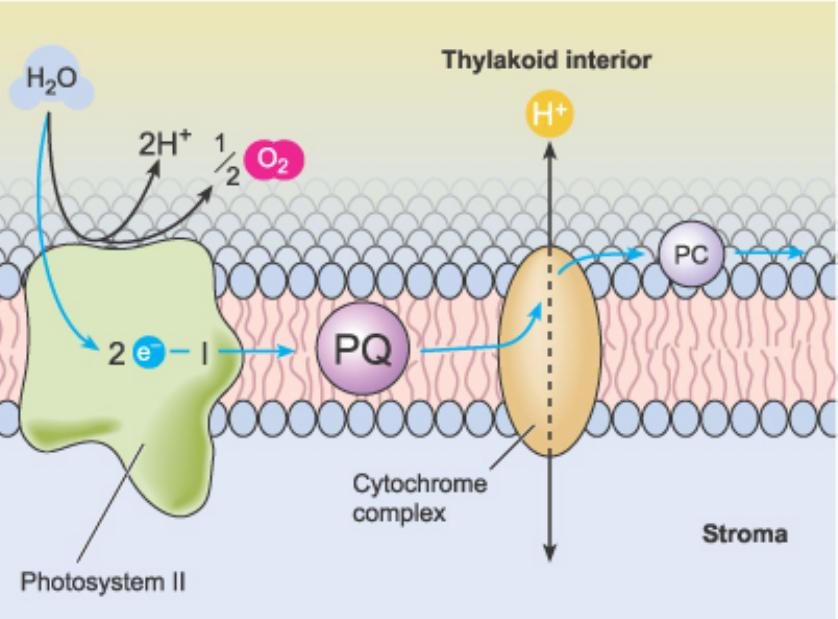

------------------------------------------------------------
img_9


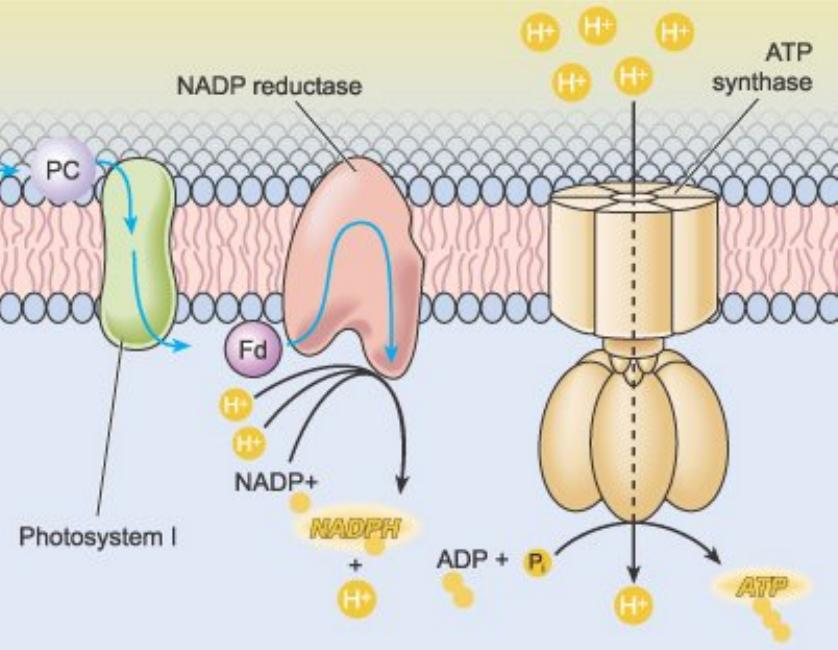

------------------------------------------------------------
img_10


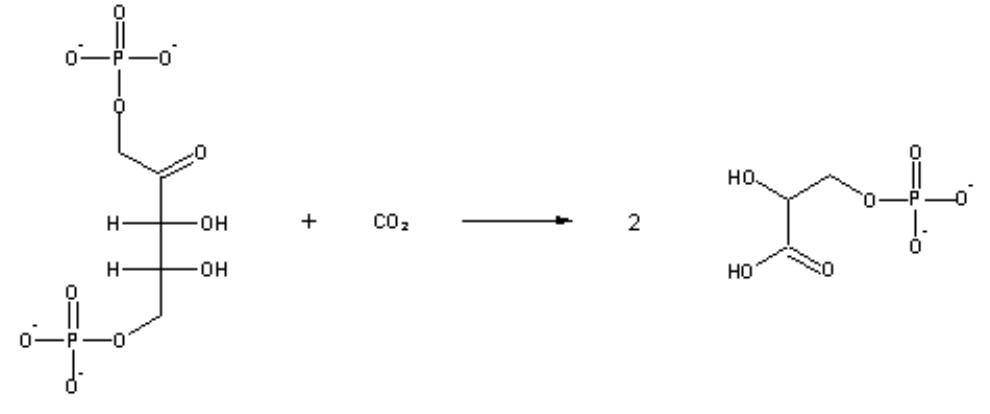

------------------------------------------------------------
img_11


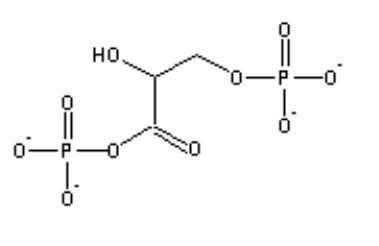

------------------------------------------------------------
img_12


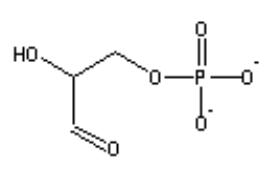

------------------------------------------------------------
img_13


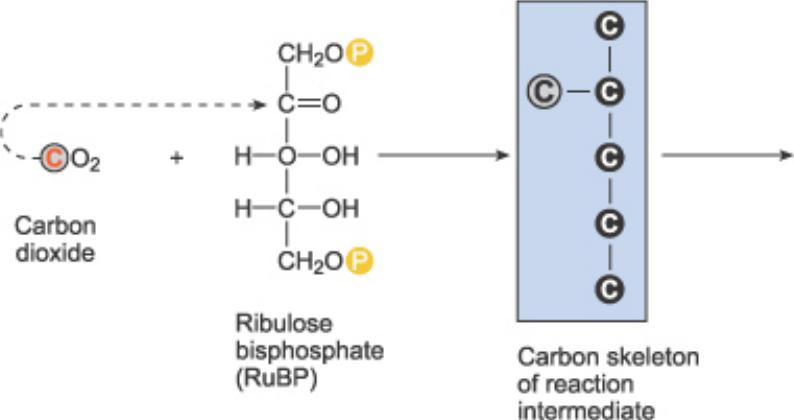

------------------------------------------------------------
img_14


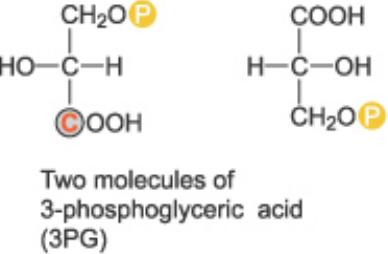

------------------------------------------------------------
img_15


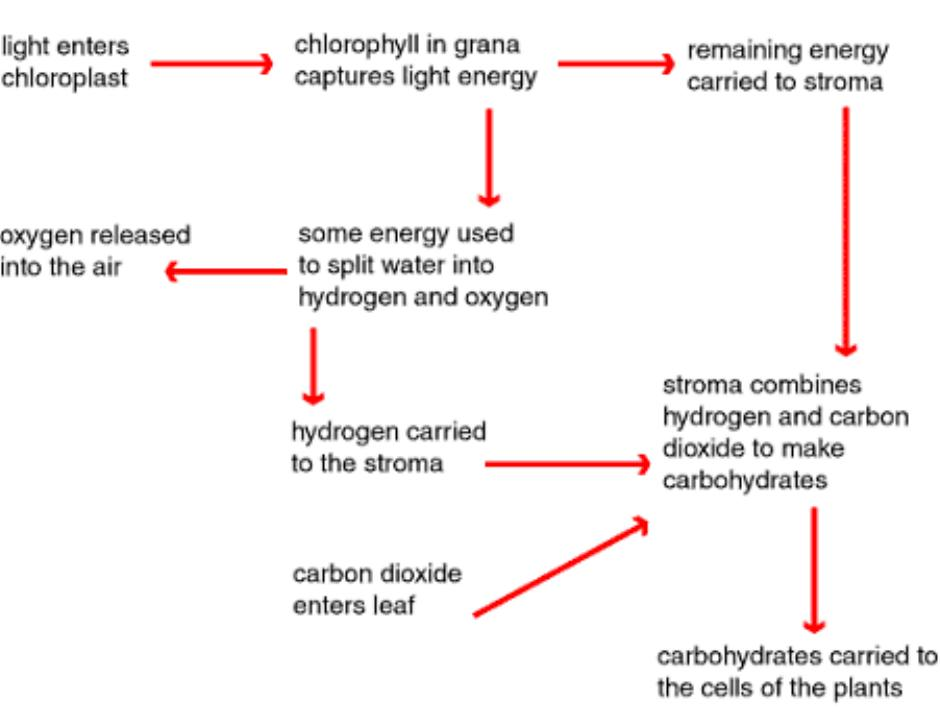

------------------------------------------------------------


In [57]:
for image in image_summaries:
    print(image.name)
    display_base64_image(image.base64_code)
    print("------------------------------------------------------------")


In [58]:
prompt_template = """Explain the images in 3-4 lines, keep it crisp concise to the point"""
messages = [
    (
        "user",
        [
            {"type": "text", "text": prompt_template},
            {
                "type": "image_url",
                "image_url": {"url": "data:image/jpeg;base64,{image}"},
            },
        ],
    )
]

prompt = ChatPromptTemplate.from_messages(messages)

chain = prompt | ChatGroq(temperature=0.5, model="llama-3.2-11b-vision-preview") | StrOutputParser()
for img in image_summaries:
    summary = chain.invoke({"image": img.base64_code})
    img.summary = summary
#  If too many images then can run out of tokens and error

In [15]:
image_summaries

In [59]:
prompt_text =  """
Objective:
You are a poster designer. You area given a JSON object of element_types and its content to be put in the poster.
You have to go throught the image summaries and decide which pictuRES will be suitable for the overall poster.
Eg if u feel an image is appropriate after an element just add element: image_i , content : img_j where img_j is the
actual image number given in summary. Image_i numbering starts from 1,2...

Here is your content : {content}
Here is your image summaries : {image_summaries}

INSTRUCTIONS
- Just add element: image_i , content : img_j where img_j is the actual image number given in summary. Image_i numbering starts from 1,2...
- ADD IMAGES WHEREVER U SEEM NECECSSARY AND A GOOD MATCH WITH THE EXISTING CONTENT LAYOUT


Exemplar:
ex1
```
[
    {{
        "element_type": "heading_1",
        "content": "Introduction to Renewable Energy"
    }},
    {{
        "element_type": "text_box_1",
        "content": "Renewable energy sources, such as solar, wind, and hydropower, are becoming increasingly important to reduce carbon emissions and promote sustainability. These energy sources are replenished naturally and have minimal impact on the environment when compared to traditional fossil fuels."
    }},
    {{
        "element_type": "sub_heading_1",
        "content": "Key Benefits of Renewable Energy"
    }},
    {{
        "element_type": "image_1",
        "content": "img_2"
    }},
    {{
        "element_type": "bullet_points_1",
        "content": [
            "Reduces greenhouse gas emissions, helping to mitigate climate change",
            "Lowers dependence on finite fossil fuel resources, enhancing energy security",
            "Provides long-term cost savings through reduced operational costs and minimal fuel expenses",
            "Promotes local job creation and economic development in the clean energy sector"
        ]
    }},
    {{
        "element_type": "text_box_2",
        "content": "Recent advancements in technology have significantly improved the efficiency and affordability of renewable energy systems. Innovations such as smart grids and battery storage solutions are helping to integrate renewable energy into existing power grids more seamlessly."
    }},
    {{
        "element_type": "sub_heading_2",
        "content": "Challenges and Future Scope"
    }},
    {{
        "element_type": "bullet_points_2",
        "content": [
            "Storage and grid integration to ensure reliability and stability of renewable sources",
            "Policy and regulatory challenges that affect large-scale adoption",
            "Need for increased investments in research and development to improve efficiency",
            "Public awareness and education to encourage adoption of renewable technologies"
        ]
    }},
    {{
        "element_type": "image_2",
        "content": "img_8"
    }},
    {{
        "element_type": "text_box_3",
        "content": "Despite the challenges, the future of renewable energy looks promising with continued innovation and global efforts to
        transition toward a cleaner energy economy. Governments, industries, and communities are collaborating to create a sustainable energy landscape."
    }}
]
```


ex2
```
[
    {{
        "element_type": "heading_1",
        "content": "Space Exploration: Challenges, Innovations, and Future Prospects"
    }},
    {{
        "element_type": "text_box_1",
        "content": "Space exploration has expanded human understanding of the universe, driving scientific breakthroughs, technological advancements, and discussions about the future of interplanetary travel. From robotic probes to human-led missions, space agencies and private enterprises continue to push the limits of what is achievable beyond Earth."
    }},
    {{
        "element_type": "sub_heading_1",
        "content": "Current Challenges in Space Exploration"
    }},
    {{
        "element_type": "bullet_points_1",
        "content": [
            "High costs associated with spacecraft development, mission planning, and long-term sustainability",
            "Radiation exposure poses severe health risks for astronauts on extended space missions",
            "Technical and engineering challenges in propulsion systems for deep-space travel",
            "Space debris management and sustainability issues impacting future missions",
            "Psychological and physiological effects of prolonged isolation in space environments"
        ]
    }},
    {{
        "element_type": "text_box_2",
        "content": "Overcoming these challenges requires advancements in materials science, improved radiation shielding, and the development of efficient propulsion systems. International collaboration plays a crucial role in addressing these issues and ensuring the long-term success of space missions."
    }},
    {{
        "element_type": "sub_heading_2",
        "content": "Innovative Technologies in Space Exploration"
    }},
    {{
        "element_type": "image_1",
        "content": "img_5"
    }},
    {{
        "element_type": "bullet_points_2",
        "content": [
            "Reusable rocket technology reduces costs and improves mission feasibility",
            "AI-driven navigation systems enhance precision and efficiency in space travel",
            "Space habitats designed for long-duration missions improve astronaut safety",
            "Nuclear propulsion systems could significantly cut travel time for deep-space missions",
            "Autonomous robotic explorers assist in planetary research and resource extraction"
        ]
    }},
    {{
        "element_type": "sub_heading_3",
        "content": "The Future of Space Travel and Exploration"
    }},
    {{
        "element_type": "text_box_3",
        "content": "Future missions will focus on establishing a permanent human presence on the Moon and Mars. Investments in asteroid mining and space-based manufacturing are expected to drive economic opportunities beyond Earth. Advancements in propulsion and life-support systems will be critical in making long-duration space travel viable."
    }},
    {{
        "element_type": "text_box_4",
        "content": "As space exploration continues to evolve, humanity is on the verge of becoming an interplanetary species. The development of sustainable space ecosystems and interstellar travel technologies will define the next era of human civilization."
    }},
    {{
        "element_type": "image_2",
        "content": "img_9"
    }},
    {{
        "element_type": "image_3",
        "content": "img_5"
    }}


]
```

ex3
```
[
    {{
        "element_type": "heading_1",
        "content": "The Expanding Role of Artificial Intelligence in Cybersecurity"
    }},
    {{
        "element_type": "text_box_1",
        "content": "Artificial Intelligence (AI) is transforming cybersecurity by offering real-time threat detection, predictive analytics, and automated security responses. AI-driven systems process vast datasets to recognize patterns, detect anomalies, and mitigate cyber threats before they cause significant damage. With the rise of cyberattacks, AI plays a crucial role in strengthening defenses and reducing human workload in security operations."
    }},
    {{
        "element_type": "sub_heading_1",
        "content": "Key Applications of AI in Cybersecurity"
    }},
    {{
        "element_type": "image_1",
        "content": "img_5"
    }}
    {{
        "element_type": "bullet_points_1",
        "content": [
            "AI-powered threat detection prevents cyber attacks before they escalate by identifying malicious patterns",
            "Behavioral analytics help detect anomalies in user activities to prevent unauthorized access",
            "Automated security responses improve reaction times, reducing the impact of cyber incidents",
            "Advanced encryption and AI-based authentication enhance data protection across networks",
            "Machine learning models continuously adapt to new cyber threats, ensuring proactive defense"
        ]
    }},
    {{
        "element_type": "sub_heading_2",
        "content": "Challenges and Ethical Concerns in AI-Driven Cybersecurity"
    }},
    {{
        "element_type": "text_box_2",
        "content": "Despite its benefits, AI in cybersecurity comes with challenges such as false positives, adversarial AI attacks, and
          ethical concerns regarding data privacy and surveillance. Over-reliance on AI could also lead to reduced human intervention, making systems vulnerable to
          sophisticated hacking techniques. Ensuring transparency, fairness, and accountability in AI-driven security solutions is essential for maintaining trust and reliability."
    }},
    {{
        "element_type": "text_box_3",
        "content": "With continuous advancements, AI is set to become an indispensable component of modern cybersecurity frameworks.
        However, organizations must strike a balance between automation and human expertise to ensure robust, adaptive,
        and ethical cybersecurity solutions. Future developments in AI governance and security policies will play a crucial role in shaping the safe and effective integration of AI into cybersecurity."
    }}
]
```


3) POINTS TO BE STRICTLY FOLLOWED:
-Return the extracted content in a JSON format where each element is associated with a type and its content.
-The keys are element_type, content
-The image_summary consists of img no and its summary, For an image element the content should be the appropriate img number from its summary
-DO NOT GENERATE ANY EXTRA CONTENT ONLY. STRICTLY FOLLOW THE FORMAT GIVEN BELOW IN THE EXEMPLAR.
-THE TOTAL NUMBER OF ELEMENTS SHOULD BE BETWEEN 7 - 15.
-DO NOT MODIFY THE PRE-EXISTING CONTENT
"""



prompt = ChatPromptTemplate.from_template(prompt_text)
model = ChatGroq(temperature=0.5, model="llama-3.3-70b-versatile")
chain = prompt | model | SimpleJsonOutputParser()
# can lead to error if LLM generates something not in JSON format.

In [60]:
img_info = {}
for img in image_summaries:
    img_info[img.name] = img.summary
temp_text = [" ".join(texts)]


In [61]:
mllm_content = chain.invoke({"content": text_summaries[0], "image_summaries": img_info})

In [62]:
mllm_content

[{'element_type': 'heading_1', 'content': 'Photosynthesis'},
 {'element_type': 'text_box_1',
  'content': 'Photosynthesis is the process by which plants, some bacteria and some protistans use the energy from sunlight to produce glucose from carbon dioxide and water.'},
 {'element_type': 'image_1', 'content': 'img_0'},
 {'element_type': 'sub_heading_1', 'content': 'The Process of Photosynthesis'},
 {'element_type': 'bullet_points_1',
  'content': ['Light-dependent reactions: light energy is trapped by chlorophyll to make ATP and NADPH',
   'Light-independent reactions: ATP and NADPH are used to make carbohydrates from carbon dioxide',
   'Water is split into oxygen, hydrogen ions and free electrons',
   'Electrons are transferred to an electron acceptor, resulting in the formation of NADPH']},
 {'element_type': 'image_2', 'content': 'img_2'},
 {'element_type': 'text_box_2',
  'content': 'The overall equation for photosynthesis is: sunlight + carbon dioxide + water = glucose + oxygen'},


In [63]:
img_content = {}
for ele in mllm_content:
    if ele["element_type"].startswith("image"):
        num = int(ele["content"].split("_")[-1])
        print(num)
        img_content[ele["element_type"]] = image_summaries[num].base64_code

0
2
9
13


In [64]:
img_content

{'image_1': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAB0AOUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiuWm8SXUfxItvDojj+zS2bXBf+LcKAOporN01tXN7qA1FIFthL/ohjOWKY/i981pUAFFc/421y48N+ENR1a1RHmto9yq/Q81r6dcNd6XaXLgB5oUkYDoCVBoA

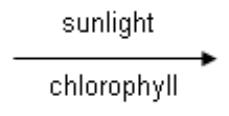

------------------------------------------------------------


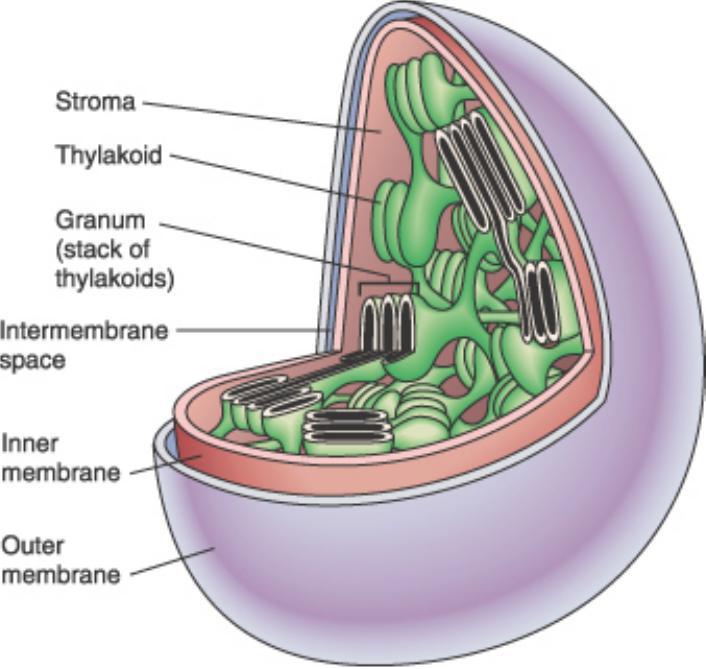

------------------------------------------------------------


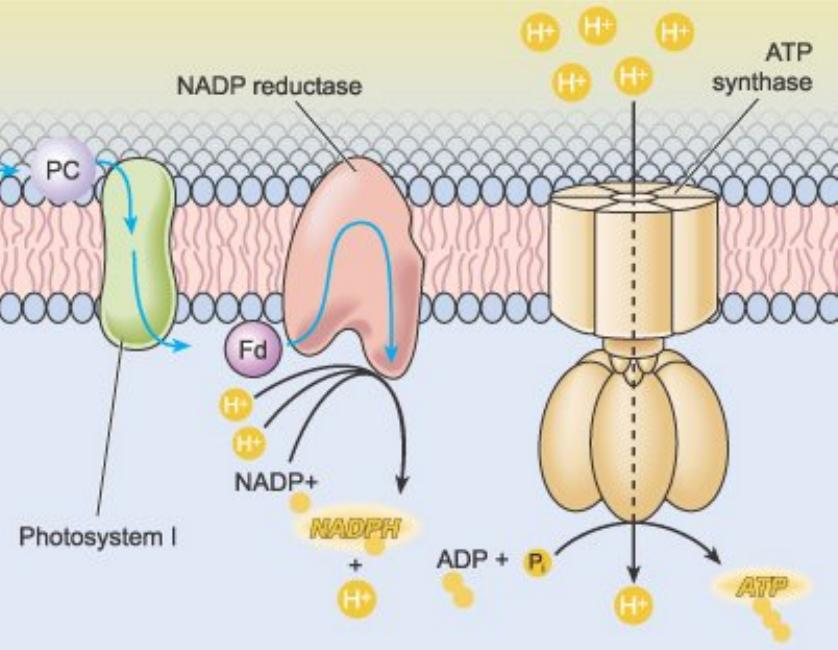

------------------------------------------------------------


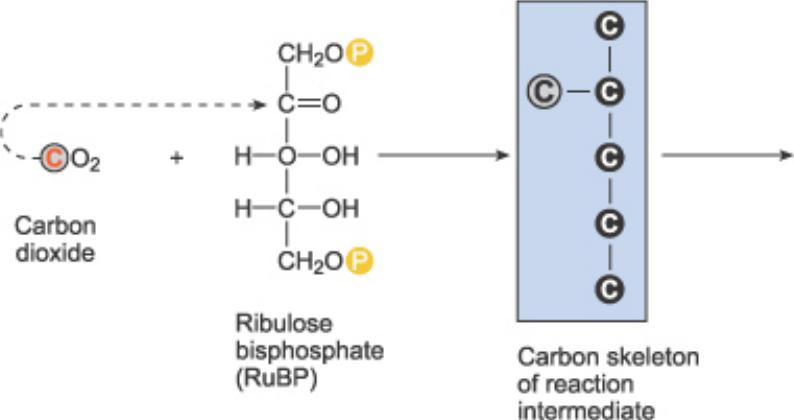

------------------------------------------------------------


In [65]:
for ele, img in img_content.items():
    display_base64_image(img)
    print("------------------------------------------------------------")


In [66]:
prompt_text = """"

You are a poster designer. Youre task is to generate bounding boxes for the content.
You are given a json object of element_type and content. Based on the content you u have to predict
  X_center : the x coord of center of bounding box
  Y_center : the x coord of center of bounding box
  h : height of bounding box
  w : width of bounding box
  Here is your content: {content}

  The size of the poster is {canvas_width} and canvas {canvas_height}
  font size of heading is 25px
  font size of subheading is 20px
  font size of text_box and bullet_points is 15px

  Your task is to generate appropriate bounding boxes that should be non overlapping, aesthetically pleasing
  and content should be enclosed within
  The heading should always be at the top
  The text_box and bullet_points can be side by side or one below the other
  The output has to be  JSON format

  Exemplar:

   {{
    'heading_1': [600, 50, 50, 1000],
    'text_box_1': [300, 130, 100, 300],
    'sub_heading_1': [125, 220, 50, 1],
    'image_1': [200, 400, 100, 150]
    'bullet_points_1': [600, 400, 120, 500],
    'sub_heading_2': [600, 400, 60, 1000],
    'bullet_points_2': [600, 480, 120, 500],
    'sub_heading_3': [600, 580, 70, 1000],
    'text_box_2': [600, 650, 100, 1000],
    'image_2': [600, 650, 200, 280],
    'sub_heading_4': [600, 730, 70, 1000],
    'bullet_points_3': [600, 780, 100, 500]
  }}

  OUTPUT FORMAT
  - It has to be a strict JSON object with element_type (from content) and (X_cenetr,y_center, height, width)
    bullet_points_3': [600, 780, 500, 100]
  - DO NOT PRINT ANY THING EXTRA, "like heres your ..." OR any reasoning steps

  """

prompt = ChatPromptTemplate.from_template(prompt_text)
model = ChatGroq(temperature=0.5, model="llama-3.3-70b-versatile")
chain =  prompt | model | SimpleJsonOutputParser()




In [67]:
bboxes = chain.invoke({"content": mllm_content, "canvas_width":"1200px", "canvas_height":"800px" })


In [68]:
bboxes

{'heading_1': [600, 50, 50, 1000],
 'text_box_1': [50, 150, 150, 400],
 'image_1': [500, 150, 200, 200],
 'sub_heading_1': [600, 250, 30, 600],
 'bullet_points_1': [50, 300, 200, 400],
 'sub_heading_2': [600, 400, 30, 600],
 'image_2': [500, 450, 200, 200],
 'text_box_2': [50, 450, 150, 300],
 'sub_heading_3': [600, 550, 30, 600],
 'image_3': [500, 600, 200, 200],
 'bullet_points_2': [50, 600, 200, 400],
 'text_box_3': [50, 750, 150, 300],
 'sub_heading_4': [600, 700, 30, 600],
 'image_4': [500, 750, 200, 200],
 'bullet_points_3': [50, 850, 200, 400]}

In [86]:
from PIL import Image, ImageDraw, ImageFont
import textwrap
import base64
from io import BytesIO

class GeneratePoster:
    def __init__(self, content_data, img_data, bounding_boxes, canvas_width=1200, canvas_height=800, padding = 10):
        """
        Initialize the poster generator with content and layout configuration

        Args:
            content_data: List of dictionaries containing element_type and content
            bounding_boxes: Dictionary mapping element_type to (x_center, y_center, width, height)
            canvas_width: Width of the poster in pixels
            canvas_height: Height of the poster in pixels
        """
        self.content_data = content_data
        self.bounding_boxes = bounding_boxes
        self.img_data = img_data
        self.canvas_width = canvas_width
        self.canvas_height = canvas_height
        self.padding = padding

        self.colors = {
            'heading': (0, 100, 0),  # dark green
            'sub_heading': (0, 150, 0),  # medium green
            'text_box': (0, 0, 0),  # black
            'bullet_points': (0, 0, 0)  # black
        }
        # Initialize fonts
        self._initialize_fonts()

    def _initialize_fonts(self):
        """Initialize all required fonts with fallbacks"""
        try:
            self.fonts = {
                'heading': ImageFont.truetype("./arialbd.ttf", 30),
                'sub_heading': ImageFont.truetype("./arialbd.ttf", 25),
                'text_box': ImageFont.truetype("./arial.ttf", 20),
                'bullet_points': ImageFont.truetype("./arial.ttf", 20)
            }
        except:
            # Fallback to default fonts if specified fonts not found
            default_font = ImageFont.load_default()
            self.fonts = {
                'heading': default_font,
                'sub_heading': default_font,
                'text_box': default_font,
                'bullet_points': default_font
            }

    def _draw_text_in_box(self, draw, text, box, font, color, is_bullet_points=False, show_box = False):
        """
        Draw text within a bounding box with proper wrapping

        Args:
            draw: PIL ImageDraw object
            text: Text content (string or list of strings for bullet points)
            box: Tuple of (x_center, y_center, width, height)
            font: Font to use
            color: Text color
            is_bullet_points: Whether to render as bullet points
        """
        x_center, y_center, height, width = box
        x_left = x_center - width // 2
        y_top = y_center - height // 2

        # Add 10px padding inside the box
        content_x = x_left + self.padding
        content_y = y_top + self.padding
        content_width = width - 2*self.padding
        content_height = height - 2*self.padding

        # Draw the bounding box rectangle if requested
        if show_box:
            draw.rectangle(
                [(x_left, y_top), (x_left + width, y_top + height)],
                outline=(200, 200, 200),  # Light gray border
                width=2
            )

        if is_bullet_points and isinstance(text, list):
            # Handle bullet points
            line_height = font.size + 5
            current_y = content_y

            for item in text:
                # Draw bullet point
                draw.text((content_x, current_y + 5), "•", fill=color, font=font)

                # Wrap text with padding consideration
                wrapped_lines = textwrap.wrap(item, width=content_width//(font.size//2))
                for line in wrapped_lines:
                    draw.text((content_x + 20, current_y), line, fill=color, font=font)
                    current_y += line_height

                    # Check if we've exceeded the box height
                    if current_y > y_top + content_height:
                        break
        else:
            # Handle regular text
            if isinstance(text, list):
                text = " ".join(text)

            # Wrap text with padding consideration
            wrapped_lines = textwrap.wrap(text, width=content_width//(font.size//2))
            line_height = font.size + 5
            current_y = content_y

            for line in wrapped_lines:
                draw.text((content_x, current_y), line, fill=color, font=font)
                current_y += line_height

                # Check if we've exceeded the box height
                if current_y > y_top + content_height:
                    break

    def _draw_image_in_box(self, image_canvas, base64_string, box):
      """
      Draws an image inside a bounding box on the canvas.

      Args:
          image_canvas: PIL Image object to paste onto.
          base64_string: Base64-encoded image string.
          box: Tuple of (x_center, y_center, height, width).
      """
      x_center, y_center, height, width = box
      x_left = x_center - width // 2
      y_top = y_center - height // 2

      try:
          # Decode and open image
          image_data = base64.b64decode(base64_string)
          img = Image.open(BytesIO(image_data)).convert("RGB")

          # Resize image to fit box
          img = img.resize((width, height), Image.LANCZOS)

          # Paste the image onto the canvas
          image_canvas.paste(img, (x_left, y_top))
      except Exception as e:
          print("Error drawing image:", e)


    def draw(self, output_path="poster.png"):
        """
        Generate and save the poster

        Args:
            output_path: Path to save the generated poster
        """
        # Create blank canvas
        image = Image.new('RGB', (self.canvas_width, self.canvas_height), (255, 255, 255))
        draw = ImageDraw.Draw(image)

        # Draw each element
        for element in self.content_data:
            element_type = element['element_type']
            content = element['content']
            box = self.bounding_boxes[element_type]

            # Determine font and color
            if element_type.startswith('heading'):
                font = self.fonts['heading']
                color = self.colors['heading']
                bullet = False
                self._draw_text_in_box(draw, content, box, font, color, is_bullet_points=bullet, show_box=True)

            elif element_type.startswith('sub_heading'):
                level = element_type.split('_')[-1]
                font = self.fonts['sub_heading']
                color = self.colors['sub_heading']
                bullet = False
                self._draw_text_in_box(draw, content, box, font, color, is_bullet_points=bullet, show_box=True)

            elif element_type.startswith('text_box'):
                font = self.fonts['text_box']
                color = self.colors['text_box']
                bullet = False
                self._draw_text_in_box(draw, content, box, font, color, is_bullet_points=bullet, show_box=True)

            elif element_type.startswith('bullet_points'):
                font = self.fonts['bullet_points']
                color = self.colors['bullet_points']
                bullet = True
                self._draw_text_in_box(draw, content, box, font, color, is_bullet_points=bullet, show_box=True)

            elif element_type.startswith("image"):
                content = self.img_data[element_type] # b64 string
                self._draw_image_in_box(image, content, box)

        # Save and return the image
        #image.save(output_path)
        image.show()
        return image





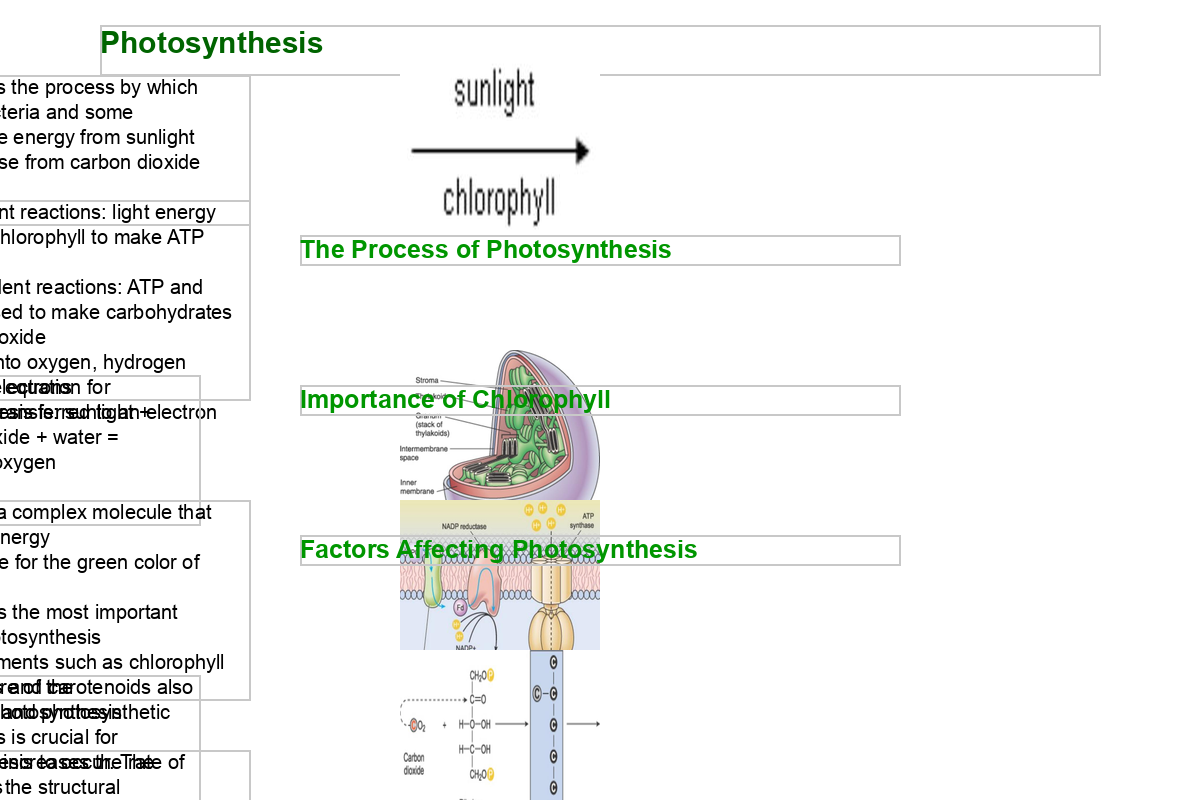

In [87]:
content_data = mllm_content
bounding_boxes = bboxes
img_data = img_content
poster = GeneratePoster(content_data, img_data, bounding_boxes, padding = 0)
poster.draw("photosynthesis_poster.png")

## Image protion

In [ ]:
text_summaries[0][0]["element_type"]

In [ ]:
prompt_template = """Explain the images in 3-4 lines, keep it crisp concise to the point"""
messages = [
    (
        "user",
        [
            {"type": "text", "text": prompt_template},
            {
                "type": "image_url",
                "image_url": {"url": "data:image/jpeg;base64,{image}"},
            },
        ],
    )
]

prompt = ChatPromptTemplate.from_messages(messages)

chain = prompt | ChatGroq(temperature=0.5, model="llama-3.2-11b-vision-preview") | StrOutputParser()
image_summaries = {}
for i, image in enumerate(images):
    summary = chain.invoke({"image": image})
    image_summaries[f"image_{i+1}"] = summary

In [ ]:
image_summaries

In [ ]:
prompt_text = """U are an assistant to design a poster layout. I am providing the poster_elements in the poster
For a given element_type and its corresponding content, check whether any poster_element content matches with any image summary.
Basically your goal is to determine if any image is appropriate for a given content

INSTRUCTIONS
- the poster_element consists of element_type and content. It is a JSON object; based on the content go through the
  list of image summaries and decide whether if any content matches any image summary and is possibly an image to be displayed
  in the final poster
- OUTPUT : Give the image number if any match like image_1 , if no match then N/A
  Ex Heading_1: image_1
     bullet_points_1: N/A
     text_box_1: N/A
     sub_heading_2: N/A
     bullet_points_2: image_2
     text_box_2: N/A
     heading_3: N/A
     bullet_points_3: image_5
     text_box_3: N/A
  DO NOT PRINT ANYTHING EXTRA, DO NOT PRINT ANY EXPLANATIONS only the image number

poster_element: {layout_content}
image_summaries: {image_summaries}
"""
prompt_template = ChatPromptTemplate.from_template(prompt_text)
chain = prompt_template | ChatGroq(temperature=0.5, model="llama-3.3-70b-versatile") | StrOutputParser()
img_match = {}
for i in range(len(text_summaries[0])):
  summary = chain.invoke({"layout_content": text_summaries[0][i], "image_summaries": image_summaries})
  img_match[text_summaries[0][i]["element_type"]] = summary

In [ ]:
img_match

In [ ]:
text_summaries[0]